<a href="https://colab.research.google.com/github/almeida-cma/TI_TEMA01/blob/main/TI_T1_Cap_Sens_Atua.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

📋 Dados Simulados de Sensores e Estado dos Atuadores:


,timestamp,temperatura (°C),luminosidade,ar-condicionado,lâmpada
12,2025-06-16 23:09:40.249147,24.73,398.0,OFF,OFF
13,2025-06-16 23:10:40.249147,18.26,241.3,OFF,ON
14,2025-06-16 23:11:40.249147,18.83,523.4,OFF,OFF
15,2025-06-16 23:12:40.249147,22.31,216.9,OFF,ON
16,2025-06-16 23:13:40.249147,20.96,431.3,OFF,OFF
17,2025-06-16 23:14:40.249147,24.94,106.0,OFF,ON
18,2025-06-16 23:15:40.249147,21.28,200.8,OFF,ON
19,2025-06-16 23:16:40.249147,19.76,429.5,OFF,OFF


<ipython-input-6-1823954703>:54: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(df['timestamp'], rotation=45)


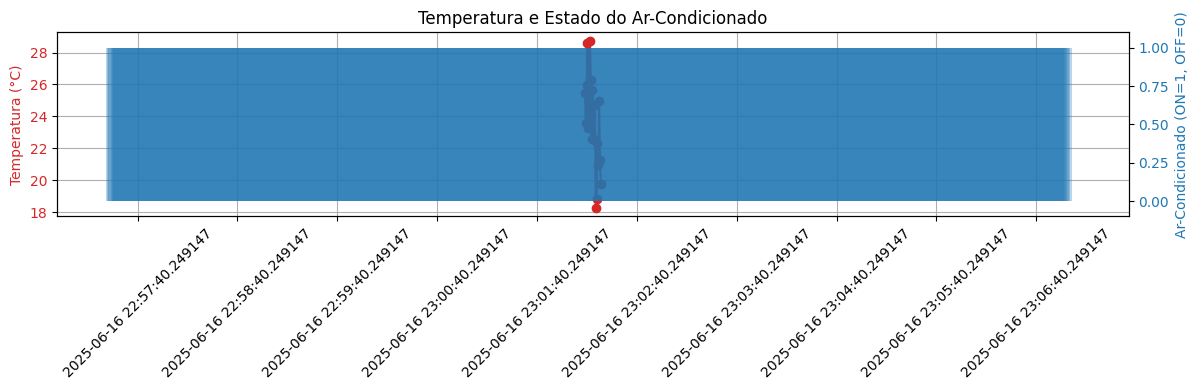

<ipython-input-6-1823954703>:75: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(df['timestamp'], rotation=45)


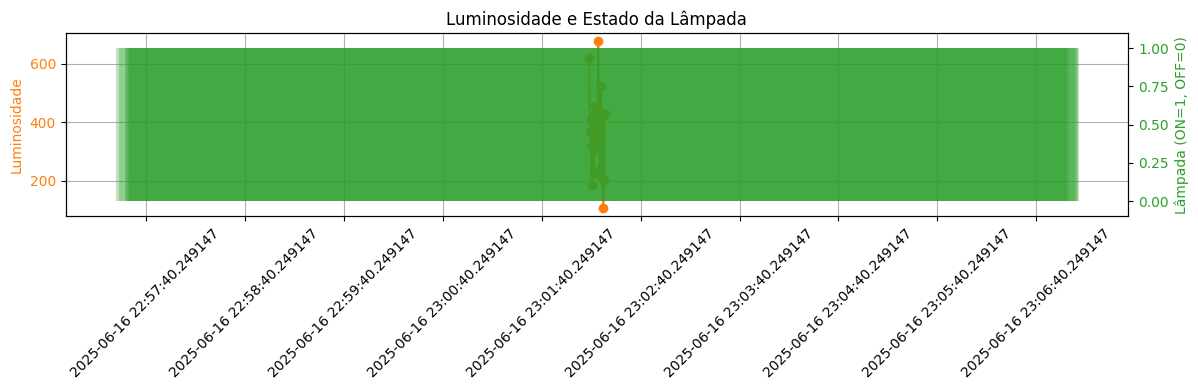

In [6]:
#@title ⚙️ Simulação: Sensores e Atuadores com Lógica de Controle

import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

# Simula dados dos sensores (20 leituras)
np.random.seed(42)

tempo_inicial = datetime.now()
n = 20

temperaturas = np.random.normal(loc=24, scale=3, size=n)  # Média 24ºC +-3
luminosidades = np.random.normal(loc=400, scale=150, size=n)  # Média 400 +-150

# Ajusta luminosidade para não ter valor negativo
luminosidades = np.clip(luminosidades, 0, None)

# Lógica de atuadores
def controle_atuadores(temp, luz):
    ar_condicionado = "ON" if temp > 25 else "OFF"
    lampada = "ON" if luz < 300 else "OFF"
    return ar_condicionado, lampada

# Monta DataFrame com entrada e saída
dados = []
for i in range(n):
    t = tempo_inicial + timedelta(minutes=i)
    temp = temperaturas[i]
    luz = luminosidades[i]
    ar, lamp = controle_atuadores(temp, luz)
    dados.append({
        "timestamp": t,
        "temperatura (°C)": round(temp, 2),
        "luminosidade": round(luz, 1),
        "ar-condicionado": ar,
        "lâmpada": lamp
    })

df = pd.DataFrame(dados)

# Exibe tabela resumo
print("📋 Dados Simulados de Sensores e Estado dos Atuadores:")
display(df.tail(8))

# Gráfico da temperatura e estado do ar-condicionado
fig, ax1 = plt.subplots(figsize=(12, 4))

ax1.plot(df['timestamp'], df['temperatura (°C)'], color='tab:red', marker='o', label='Temperatura (°C)')
ax1.set_ylabel('Temperatura (°C)', color='tab:red')
ax1.tick_params(axis='y', labelcolor='tab:red')
ax1.grid(True)
ax1.set_xticklabels(df['timestamp'], rotation=45)

# Overlay: estado do ar-condicionado como barras
ax2 = ax1.twinx()
ar_on = [1 if estado=="ON" else 0 for estado in df['ar-condicionado']]
ax2.bar(df['timestamp'], ar_on, alpha=0.3, color='tab:blue', label='Ar-Condicionado ON')
ax2.set_ylabel('Ar-Condicionado (ON=1, OFF=0)', color='tab:blue')
ax2.tick_params(axis='y', labelcolor='tab:blue')
ax2.set_ylim(-0.1, 1.1)

plt.title('Temperatura e Estado do Ar-Condicionado')
fig.tight_layout()
plt.show()

# Gráfico da luminosidade e estado da lâmpada
fig, ax1 = plt.subplots(figsize=(12, 4))

ax1.plot(df['timestamp'], df['luminosidade'], color='tab:orange', marker='o', label='Luminosidade')
ax1.set_ylabel('Luminosidade', color='tab:orange')
ax1.tick_params(axis='y', labelcolor='tab:orange')
ax1.grid(True)
ax1.set_xticklabels(df['timestamp'], rotation=45)

# Overlay: estado da lâmpada como barras
ax2 = ax1.twinx()
lamp_on = [1 if estado=="ON" else 0 for estado in df['lâmpada']]
ax2.bar(df['timestamp'], lamp_on, alpha=0.3, color='tab:green', label='Lâmpada ON')
ax2.set_ylabel('Lâmpada (ON=1, OFF=0)', color='tab:green')
ax2.tick_params(axis='y', labelcolor='tab:green')
ax2.set_ylim(-0.1, 1.1)

plt.title('Luminosidade e Estado da Lâmpada')
fig.tight_layout()
plt.show()
